In [1]:
import warnings

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
%%capture

from ding0.core import NetworkDing0
from ding0.tools.logger import setup_logger
from ding0.tools.results import save_nd_to_pickle
from ding0.tools.plots import plot_mv_topology
from egoio.tools import db
from sqlalchemy.orm import sessionmaker
import oedialect

from ding0.tools import results # to load pickl file


# create new network
nd = NetworkDing0(name='network')


# set ID of MV grid district
mv_grid_districts = [40] # fn

#### SET DING0 SETTINGS

In [3]:
# TODO set in config file
ding0_default=False
retain_all=False #  weil sonst graphen außerhalb des polys unverbunden zum graphen beibehalten werden

In [4]:
engine = db.connection(section='oedb_dialect', readonly=True)
session = sessionmaker(bind=engine)()

In [5]:
%%time

print('ding0_default', ding0_default)
if ding0_default:
    
    lv_stations, lv_grid_districts = nd.import_mv_grid_districts(session, 
                                                                 mv_grid_districts_no=mv_grid_districts)

else:
    
    ways_sql_df = nd.import_mv_grid_districts(session, ding0_default, 
                                                               mv_grid_districts_no=mv_grid_districts,
                                                               need_parameterization=True)

ding0_default False
26


Graph already fully connected.
Simplified graph: 27 to 4 nodes, 50 to 4 edges
Simplified graph: 5 to 3 nodes, 8 to 4 edges
all clusters are in range
start w. index 0


27


Finding connected graph, iteration 1 of max. 4.
Finding connected graph, number of unconnected nodes is 0.
Simplified graph: 15 to 12 nodes, 22 to 16 edges
Simplified graph: 65 to 45 nodes, 130 to 90 edges
all clusters are in range
start w. index 0


28


Graph already fully connected.
Simplified graph: 30 to 4 nodes, 56 to 4 edges
Simplified graph: 6 to 6 nodes, 10 to 10 edges
all clusters are in range
start w. index 0


29


Graph already fully connected.
Simplified graph: 17 to 2 nodes, 32 to 2 edges
Simplified graph: 14 to 10 nodes, 26 to 18 edges
all clusters are in range
start w. index 0


30


Graph already fully connected.
Simplified graph: 70 to 6 nodes, 138 to 10 edges
Simplified graph: 3 to 2 nodes, 4 to 2 edges
all clusters are in range
start w. index 0


31


Graph already fully connected.
Simplified graph: 25 to 4 nodes, 46 to 4 edges
Simplified graph: 3 to 2 nodes, 4 to 2 edges
all clusters are in range
start w. index 0


32


Graph already fully connected.
Simplified graph: 30 to 4 nodes, 56 to 4 edges
Simplified graph: 6 to 3 nodes, 10 to 4 edges
all clusters are in range
start w. index 0


33


Graph already fully connected.
Simplified graph: 28 to 6 nodes, 52 to 8 edges
Simplified graph: 11 to 4 nodes, 20 to 6 edges
all clusters are in range
start w. index 0


34


Graph already fully connected.
Simplified graph: 128 to 8 nodes, 252 to 12 edges
Simplified graph: 26 to 10 nodes, 50 to 18 edges
all clusters are in range
start w. index 0


35


Finding connected graph, iteration 1 of max. 4.
Finding connected graph, number of unconnected nodes is 7.
Finding connected graph, iteration 2 of max. 4.
Finding connected graph, number of unconnected nodes is 7.
Finding connected graph, iteration 3 of max. 4.
Finding connected graph, number of unconnected nodes is 0.
Simplified graph: 18 to 7 nodes, 30 to 8 edges
Simplified graph: 19 to 11 nodes, 38 to 22 edges
all clusters are in range
start w. index 0


36


Graph already fully connected.
Simplified graph: 14 to 2 nodes, 26 to 2 edges
Simplified graph: 6 to 4 nodes, 10 to 6 edges
all clusters are in range
start w. index 0


37


Graph already fully connected.
Simplified graph: 123 to 8 nodes, 240 to 10 edges
Simplified graph: 19 to 11 nodes, 36 to 20 edges
all clusters are in range
start w. index 0


38


Graph already fully connected.
Simplified graph: 141 to 6 nodes, 276 to 6 edges
Simplified graph: 21 to 13 nodes, 40 to 24 edges
all clusters are in range
start w. index 0


39


Graph already fully connected.
Simplified graph: 25 to 7 nodes, 48 to 12 edges


NetworkXPointlessConcept: Connectivity is undefined for the null graph.

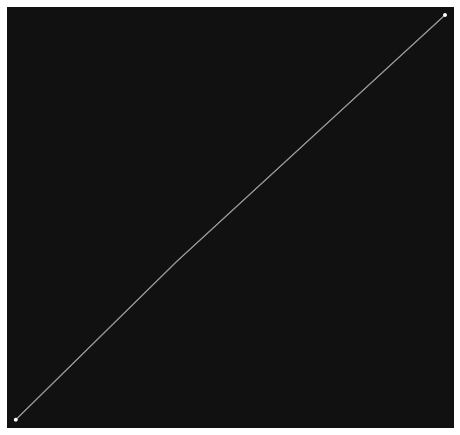

In [6]:
import osmnx as ox
#fig, ax = ox.plot_graph(outer_graph, edge_color='r', edge_linewidth=0.5, node_size=0.2, show=False, close=False)
#ox.plot_graph(graph_subdiv_directed, ax=ax)
fig, ax = ox.plot_graph(simp_graph, show=False, close=False)

#for node in street_loads_df.index.tolist():
#    ax.scatter(simp_graph.nodes[node]['x'], simp_graph.nodes[node]['y'], color='red', s=2)

In [8]:
from shapely.geometry import LineString

edges = [(u,v,k,d['length'], LineString(d['geometry'].boundary).length) for u,v,k,d in outer_graph.edges(keys=True, data=True) if d['length']>=1500]

In [9]:
for u,v,k,path_dist,euc_dist in edges:
    if path_dist > 2*euc_dist:
        print(u,v,k,path_dist,euc_dist)

In [10]:
import networkx as nx
nx.is_weakly_connected(simp_graph)

True

In [11]:
len(simp_graph.nodes), len(graph_subdiv.nodes)

(616, 999)

In [12]:
len(street_loads_df)
#len(list(set(simp_graph.nodes) & set(street_loads_df.index.tolist())))

538

In [13]:
import osmnx as ox
nodes, _ = ox.graph_to_gdfs(cluster_graph)
noi1 = nodes[nodes.cluster == 55].index.tolist()
noi2 = nodes[nodes.cluster == 38].index.tolist()

"\nax.scatter(simp_graph.nodes[8269291557]['x'], simp_graph.nodes[8269291557]['y'], color='white', s=15)\n\nax.scatter(simp_graph.nodes[300459583]['x'], simp_graph.nodes[300459583]['y'], color='white', s=15)\n\nax.scatter(simp_graph.nodes[205774745302]['x'], simp_graph.nodes[205774745302]['y'], color='white', s=15)\n\nax.scatter(simp_graph.nodes[1783501474]['x'], simp_graph.nodes[1783501474]['y'], color='white', s=15)\n"

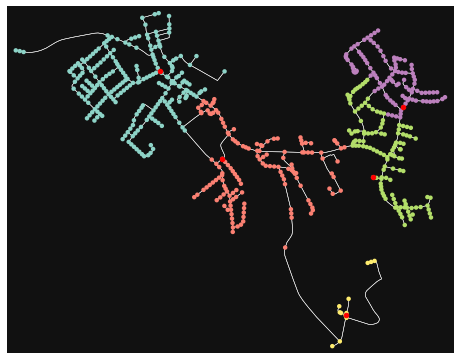

In [15]:
nc = ox.plot.get_node_colors_by_attr(cluster_graph, attr='cluster', cmap="Set3") #

fig, ax = ox.plot_graph(cluster_graph, node_color=nc, node_size=20, edge_color='w', edge_linewidth=0.5, show=False, close=False)

#fig, ax = ox.plot_graph(cluster_graph, node_size=0, show=False, close=False)
#ox.plot_graph(outer_graph, ax=ax, edge_color='b', node_size=0, show=False, close=False)


for station in mvlv_subst_list:
    ax.scatter(station.get('x'), station.get('y'), color = 'red', s=20)
'''
ax.scatter(simp_graph.nodes[8269291557]['x'], simp_graph.nodes[8269291557]['y'], color='white', s=15)

ax.scatter(simp_graph.nodes[300459583]['x'], simp_graph.nodes[300459583]['y'], color='white', s=15)

ax.scatter(simp_graph.nodes[205774745302]['x'], simp_graph.nodes[205774745302]['y'], color='white', s=15)

ax.scatter(simp_graph.nodes[1783501474]['x'], simp_graph.nodes[1783501474]['y'], color='white', s=15)
'''

#fig.savefig("PlotN.pdf",dpi=200, bbox_inches='tight')

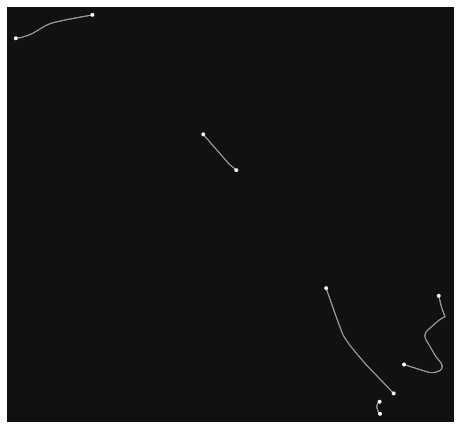

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [16]:
import osmnx as ox
ox.plot_graph(outer_graph)

In [45]:
from shapely.geometry import LineString
G = mvlv_subst_list[cluster]['graph_district']

edges = [(u,v,k,d['length'], LineString(d['geometry'].boundary).length) for u,v,k,d in G.edges(keys=True, data=True) if d['length']>=1500]

In [46]:
for u,v,k,path_dist,euc_dist in edges:
    if path_dist > 3*euc_dist:
        print(u,v,k,path_dist,euc_dist, path_dist/euc_dist)
        G.remove_edge((u,v,k))

[(2523086997, 2523087001, 0, 2545.667666047265, 8.504585788310525),
 (2523086997, 295942397, 0, 2221.2169431765856, 560.2527314171507),
 (2523087001, 2523086997, 0, 2545.667666047265, 8.504585788310525),
 (2523087001, 295942397, 0, 2610.497551978732, 567.1367814716814),
 (295942397, 2523086997, 0, 2221.2169431765856, 560.2527314171507),
 (295942397, 2523087001, 0, 2610.497551978732, 567.1367814716814)]

In [6]:
G.remove_edge((2523086997, 2523087001, 0))

NameError: name 'G' is not defined

In [28]:
import networkx as nx
import osmnx as ox
from itertools import combinations
from shapely.geometry import MultiLineString, LineString, Point
from shapely.ops import linemerge
from ding0.grid.lv_grid.routing import simplify_graph, simplify_graph_adv, remove_unloaded_deadends

In [29]:
def get_outer_conn_graph(G, inner_node_list):

    common_nodes = set(G.nodes()) & set(inner_node_list)
    G = simplify_graph_adv(G, list(common_nodes))
    G = remove_unloaded_deadends(G, list(common_nodes))
    G.remove_nodes_from(list(nx.isolates(G)))
    
    return G

In [30]:
def flatten_graph_components_to_lines(G, inner_node_list):
    # todo: add edge tags 'highway' and 'osmid' to shortest path edge

    components = list(nx.weakly_connected_components(G))
    sp_path = lambda p1, p2: nx.shortest_path(G, p1, p2, weight='length') if nx.has_path(G, p1, p2) else None
    
    nodes_to_remove = []
    edges_to_add = []
    common_nodes = set(G.nodes()) & set(inner_node_list)

    for comp in components:
        
        conn_nodes = list(comp & common_nodes)
        
        if len(comp) > 2 and len(conn_nodes) == 1:
            G.remove_nodes_from(comp)
            
        else: 
            endpoints = combinations(conn_nodes, 2)
            paths = [sp_path(n[0], n[1]) for n in endpoints]
            for path in paths:
                geoms = []
                for u, v in zip(path[:-1], path[1:]):
                    try: geom = G.edges[u,v,0]['geometry']
                    except: geom = LineString([Point((G.nodes[node]["x"], G.nodes[node]["y"])) for node in [u,v]])
                    geoms.append(geom)

                merged_line = linemerge(MultiLineString(geoms))
                edges_to_add.append([path[0], path[-1], merged_line])
                nodes_to_remove.append(list(set(comp) - set(conn_nodes)))

    for nodes in nodes_to_remove:
        G.remove_nodes_from(nodes)

    for edge in edges_to_add:
        G.add_edge(edge[0], edge[1], 0, geometry=edge[2], length=edge[2].length)
        G.add_edge(edge[1], edge[0], 0, geometry=edge[2], length=edge[2].length)
        
    return G

In [31]:
%%time
G = get_outer_conn_graph(outer_graph, inner_node_list)

Simplified graph: 2713 to 872 nodes, 5502 to 1820 edges


CPU times: user 305 ms, sys: 71 µs, total: 305 ms
Wall time: 303 ms


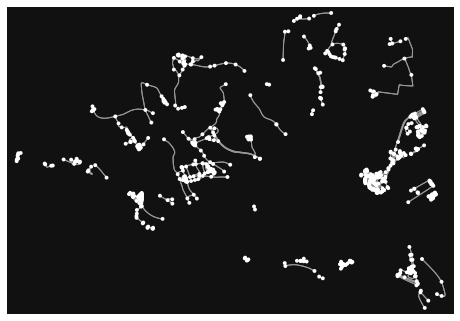

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [32]:
ox.plot_graph(G )

In [33]:
%%time
G = flatten_graph_components_to_lines(G, inner_node_list)

CPU times: user 609 ms, sys: 5 µs, total: 609 ms
Wall time: 608 ms


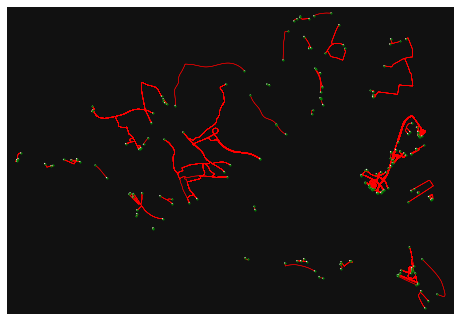

In [34]:
fig, ax = ox.plot_graph(G, edge_color='r', edge_linewidth=0.5, node_size=2, show=False, close=False)
noi = set(G.nodes()) & set(inner_node_list)
for node in noi:
    ax.scatter(G.nodes[node]['x'], G.nodes[node]['y'], color='green', s=1)
fig.savefig("Plot1.pdf",dpi=200, bbox_inches='tight')

In [35]:
compost = nx.compose(G, graph_subdiv_directed)

In [36]:
nx.is_weakly_connected(compost)

True

In [37]:
compost.number_of_nodes(), graph_subdiv_directed.number_of_nodes()

(18292, 18292)

In [20]:
nodes, edges = ox.graph_to_gdfs(compost)
edges.geometry.type.value_counts()

LineString    40452
dtype: int64

In [13]:
%%time
gsub = simplify_graph_adv(graph_subdiv_directed, street_loads_df.index.tolist())
node_list_1 = list(gsub.nodes())

Simplified graph: 999 to 644 nodes, 2040 to 1330 edges


CPU times: user 87.6 ms, sys: 331 µs, total: 87.9 ms
Wall time: 86.7 ms


In [14]:
gcomp = nx.compose(G, graph_subdiv_directed)
nx.is_weakly_connected(graph_subdiv_directed)
nodes, edges = ox.graph_to_gdfs(G)
edg = edges.loc[edges.geometry.type == 'MultiLineString']
#edg.iloc[40].geometry
edg

,,,geometry,length,osmid,highway
u,v,key,,,,


In [15]:
gcomp.number_of_nodes(), len(noi)

(999, 10)

In [17]:
#gconn = ox.utils_graph.get_largest_component(gcomp)
nx.is_weakly_connected(gcomp)

True

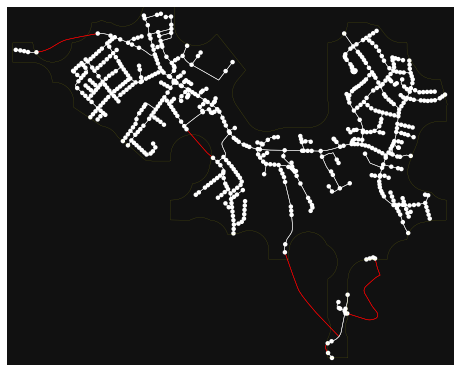

In [18]:
fig, ax = ox.plot_graph(G, edge_color='r', edge_linewidth=0.5, node_size=0.2, show=False, close=False)
ox.plot_graph(gsub, ax=ax, edge_color='w', edge_linewidth=0.5, node_size=20, show=False, close=False)
x,y = geo_load_area.exterior.xy
ax.plot(x,y, color='yellow', linewidth=0.08)
    
#for node in why:
#    ax.scatter(gcomp.nodes[node]['x'], gcomp.nodes[node]['y'], color='blue', s=0.0001)
    
for node in noi:
    ax.scatter(gcomp.nodes[node]['x'], gcomp.nodes[node]['y'], color='green', s=0.0001)

#die = list(set(noi)&set(why))
#for node in die:
#    ax.scatter(gcomp.nodes[node]['x'], gcomp.nodes[node]['y'], color='yellow', s=0.0001)
    
fig.savefig("Plot2.pdf",dpi=200, bbox_inches='tight')

In [19]:
compost = nx.compose(G, graph_subdiv_directed)

In [20]:
G.number_of_edges(), graph_subdiv_directed.number_of_edges(), compost.number_of_edges()

(10, 2040, 2050)

In [21]:
nodes, edges = ox.graph_to_gdfs(compost)
edges.highway.value_counts()

residential      1114
service           434
secondary         330
living_street      96
unclassified       74
Name: highway, dtype: int64

In [22]:
%%time
gsub2 = simplify_graph_adv(compost, street_loads_df.index.tolist())

Simplified graph: 999 to 638 nodes, 2050 to 1328 edges


CPU times: user 123 ms, sys: 209 µs, total: 123 ms
Wall time: 122 ms


In [23]:
nx.is_weakly_connected(gsub2)

True

In [24]:
node_list_2 = list(gsub2.nodes())

In [25]:
noi2 = set(node_list_2) - set(node_list_1)
len(noi2)

1

In [27]:
e = set(street_loads_df.index.tolist()) & set(gsub2.nodes())
len(e), len(street_loads_df.index.tolist())

(538, 538)

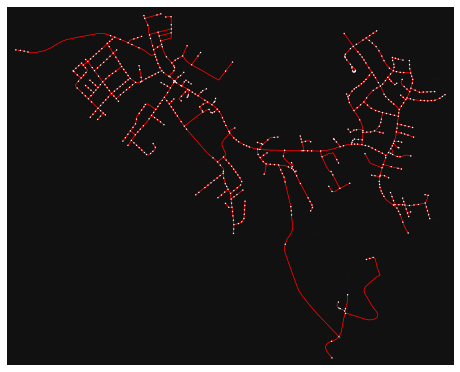

In [28]:
fig, ax = ox.plot_graph(gsub2, edge_color='r', edge_linewidth=0.5, node_size=2, show=False, close=False)

for node in noi2:
    ax.scatter(gsub2.nodes[node]['x'], gsub2.nodes[node]['y'], color='green', s=1)
    
x,y = geo_load_area.exterior.xy
ax.plot(x,y, color='yellow', linewidth=0.008)

fig.savefig("Plot3.pdf",dpi=200, bbox_inches='tight')

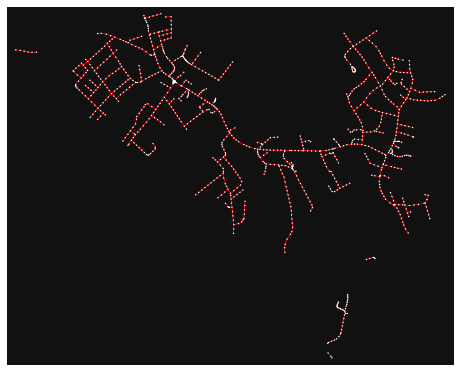

In [27]:
fig, ax = ox.plot_graph(graph_subdiv_directed, edge_color='r', edge_linewidth=0.5, node_size=2, show=False, close=False)

In [32]:
gsub.nodes[366738627]

KeyError: 366738627

In [10]:
%%time
# transform graph to connections

noi = set(G.nodes()) & set(inner_node_list)
components = list(nx.weakly_connected_components(G))
sp_path = lambda p1, p2: nx.shortest_path(G, p1, p2, weight='length') if nx.has_path(G, p1, p2) else None
nodes_to_remove = []
edges_to_add = []

for comp in components:
    conn_nodes = list(comp & noi)
    if len(comp) > 2 and len(conn_nodes) == 1:
        G.remove_nodes_from(comp)
    else: 
        ways_to_build = combinations(conn_nodes, 2)
        paths = [sp_path(w[0], w[1]) for w in ways_to_build]
        for path in paths:
            geoms = []
            for u, v in zip(path[:-1], path[1:]):
                try: geom = G.edges[u,v,0]['geometry']
                except: geom = LineString([Point((G.nodes[node]["x"], G.nodes[node]["y"])) for node in [u,v]])
                geoms.append(geom)
            lines = MultiLineString(geoms)
            merged_line = linemerge(lines)
            edge_to_add = [path[0], path[-1], merged_line]
            edges_to_add.append(edge_to_add)
            jumper_nodes = list(set(comp) - set(conn_nodes))
            nodes_to_remove.append(jumper_nodes)
    
for nodes in nodes_to_remove:
    G.remove_nodes_from(nodes)
    
for edge in edges_to_add:
    G.add_edge(edge[0], edge[1], 0, geometry=edge[2], length=edge[2].length)
    G.add_edge(edge[1], edge[0], 0, geometry=edge[2], length=edge[2].length)

CPU times: user 340 ms, sys: 16 µs, total: 340 ms
Wall time: 339 ms


In [11]:
#unloaded_island_nodes = set(G.nodes()) - noi
#G.remove_nodes_from(unloaded_island_nodes)
#len(unloaded_island_nodes)

In [20]:
why = list(set(gcomp.nodes())-set(gconn.nodes()))
why

NameError: name 'gconn' is not defined

In [51]:
components = list(nx.weakly_connected_components(gcomp))

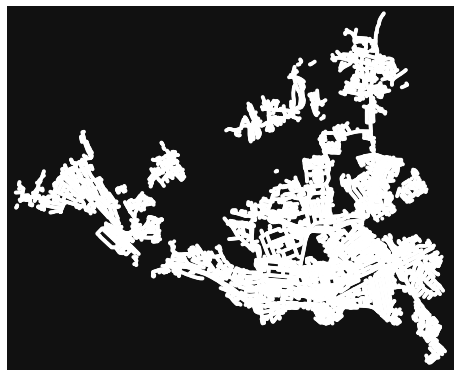

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [52]:
ox.plot_graph(graph_subdiv_directed)

In [62]:
for node in die:
    G.nodes[node]

In [ ]:
Gn = nx.compose(graph_subdiv_directed, G)

In [13]:
nx.is_weakly_connected(Gn)

True

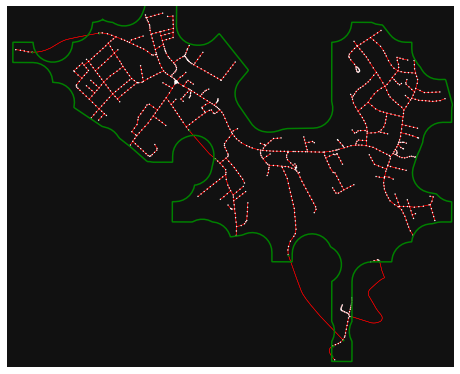

In [14]:
fig, ax = ox.plot_graph(Gn, edge_color='r', edge_linewidth=0.5, node_size=2, show=False, close=False)
for node in noi:
    ax.scatter(Gn.nodes[node]['x'], Gn.nodes[node]['y'], color='green', s=1)
x,y = geo_load_area.exterior.xy
ax.plot(x,y, color='green')

In [15]:
%%time
simp_graph = simplify_graph_adv(Gn, street_loads_df.index.tolist())

[(894865309701, 894865309702, 0), (894865309702, 894865309703, 0)]
[(894865309703, 894865309702, 0), (894865309702, 894865309701, 0)]
[(55630671901, 278153359, 0), (278153359, 66525576501, 0), (66525576501, 387102406, 0)]
[(3122778143, 317345161001, 0), (317345161001, 50673467, 0)]
[(3122778143, 50673476, 0), (50673476, 598495747, 0), (598495747, 50673483, 0)]
[(8269291555, 50673447, 0), (50673447, 2630456600, 0)]
[(3109142566, 41408118, 0), (41408118, 3127762594, 0)]
[(899946546, 899946539, 0), (899946539, 387102408, 0)]
[(60091918402, 60091918403, 0), (60091918403, 300459595, 0)]
[(7554166870, 786412164605, 0), (786412164605, 786412164604, 0), (786412164604, 786412164603, 0)]
[(310145149, 310145148, 0), (310145148, 310145147, 0), (310145147, 62029029301, 0)]
[(310145149, 7962448638, 0), (7962448638, 7962448639, 0)]
[(295686271, 300459719, 0), (300459719, 700414577501, 0)]
[(310145152, 159684669201, 0), (159684669201, 1286701540, 0)]
[(310145156, 41408140, 0), (41408140, 822802422601,

Simplified graph: 987 to 634 nodes, 2026 to 1320 edges


CPU times: user 243 ms, sys: 32.8 ms, total: 276 ms
Wall time: 245 ms


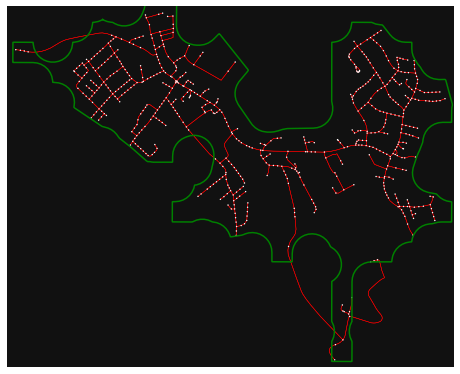

In [15]:
fig, ax = ox.plot_graph(simp_graph, edge_color='r', edge_linewidth=0.5, node_size=2, show=False, close=False)

x,y = geo_load_area.exterior.xy
ax.plot(x,y, color='green')

In [6]:
import pandas as pd
import osmnx as ox

nc = ox.plot.get_node_colors_by_attr(cluster_graph, attr='cluster', cmap="Set3") #

fig, ax = ox.plot_graph(cluster_graph, node_color=nc, node_size=1, edge_color='b', edge_linewidth=1, show=False, close=False)
#ox.plot_graph(conn_graph, ax=ax, edge_color='r', edge_linewidth=0.5, node_size=0, show=False, close=False)

x,y = geo_load_area.exterior.xy
ax.plot(x,y, color='red', linewidth=0.5)

for station in mvlv_subst_list:
    #ax.scatter(station.get('x'),station.get('y'), color='red', s=2)
    ax.text(station.get('x'),station.get('y'), station.get('cluster'), color='red')
    
for i in range(n):
    outer_nodes = nodes[nodes['cluster'] == i]
    centroid = outer_nodes['geometry'].centroid
    #ax.text(i, centroid.x.values[0], centroid.y.values[0])
    
#outer_nodes = nodes[nodes['cluster'] == 15].index.tolist()
#for node in outer_nodes:
#    ax.scatter(cluster_graph.nodes[node]['x'], cluster_graph.nodes[node]['y'], color='red')

for node in cluster_graph.nodes():
    ax.scatter(cluster_graph.nodes[node]['x'], cluster_graph.nodes[node]['y'], color='green', s=2)
    
#ax.scatter(cluster_graph.nodes[35239360]['x'], cluster_graph.nodes[35239360]['y'], color='red')
fig.savefig("Plot.pdf",dpi=200, bbox_inches='tight')

NameError: name 'cluster_graph' is not defined

In [16]:
street_loads_df.index.tolist()

[35239354,
 35239355,
 35239360,
 35239376,
 35239379,
 35239394,
 35239555,
 41408108,
 41408110,
 41408141,
 41408149,
 41408169,
 41408191,
 41408205,
 41408207,
 41408216,
 41408223,
 50673449,
 50673461,
 50673467,
 76513772,
 264082998,
 264083000,
 264083003,
 264088747,
 264088755,
 264088758,
 264088760,
 278153361,
 278153362,
 278153363,
 278153731,
 278153735,
 286697871,
 295686271,
 300459583,
 300459586,
 300459589,
 300459591,
 300459593,
 300459594,
 300459595,
 300459596,
 300459598,
 300459600,
 300459601,
 300459643,
 300459644,
 300459646,
 300459647,
 300459648,
 300459649,
 300459651,
 300459654,
 300459655,
 300459659,
 300459666,
 300459668,
 300459669,
 300459693,
 300459694,
 300459695,
 300459699,
 300459700,
 300459701,
 300459702,
 300459705,
 300459718,
 300459723,
 300459724,
 300459725,
 300459727,
 300459729,
 300459732,
 300459738,
 300459740,
 300459741,
 300459745,
 300459746,
 300459748,
 300459749,
 300459752,
 300459757,
 300459758,
 300459759,
 

In [ ]:

except:
                    geom = LineString([Point((G.nodes[node]["x"], G.nodes[node]["y"])) for node in [u,v]])
                geoms.append(geom)
            lines=MultiLineString(geoms)
            merged_line = linemerge(lines)
        edge_to_add = [path[0], path[-1], merged_line]
        edges_to_add.append(edge_to_add)
        jumper_nodes = list(set(comp) - set(conn_nodes))
        nodes_to_remove.append(jumper_nodes)

#print(nodes_to_remove)
for nodes in nodes_to_remove:
    G.remove_nodes_from(nodes)
    
for edge in edges_to_add:
    G.add_edge(edge[0], edge[1], 0, geometry=edge[2], length=edge[2].length)
    G.add_edge(edge[1], edge[0], 0, geometry=edge[2], length=edge[2].length)
       
# remove comp - conn_nodes
fig, ax = ox.plot_graph(G, edge_color='r', edge_linewidth=0.5, node_size=2, show=False, close=False)
for node in noi:
    ax.scatter(G.nodes[node]['x'], G.nodes[node]['y'], color='green', s=1)
for node in [3923450345, 6616186841]:  
    ax.scatter(G.nodes[node]['x'], G.nodes[node]['y'], color='red', s=1)
    
fig.savefig("Plot1.pdf",dpi=200, bbox_inches='tight')

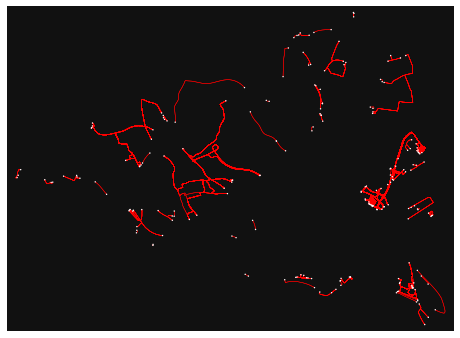

In [49]:
fig, ax = ox.plot_graph(G, edge_color='r', edge_linewidth=0.5, node_size=2, show=False, close=False)
fig.savefig("Plot1.pdf",dpi=200, bbox_inches='tight')

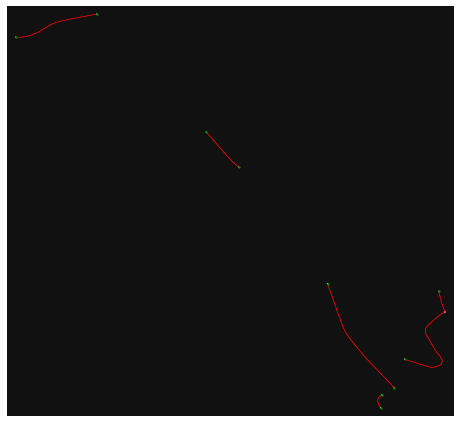

In [136]:
components = list(nx.weakly_connected_components(G))

for comp in components:
    noin = list(comp & noi)
    if len(noin) < 2:
        G.remove_nodes_from(comp)
        noi.remove(noin[0])
        
fig, ax = ox.plot_graph(G, edge_color='r', edge_linewidth=0.5, node_size=2, show=False, close=False)
for node in noi:
    ax.scatter(G.nodes[node]['x'], G.nodes[node]['y'], color='green', s=2)

In [115]:
A=list(G.subgraph(c) for c in nx.weakly_connected_components(G))[0]
A = list(A)

a = combinations(A, 2)
for x in list(a):
    print(x[0], x[1])

2627444061 2627444054
2627444061 832642749
2627444054 832642749


In [141]:
sp_path = [111, 222, 333, 444]
t = set(sp_path) - set([111, 444])
print(t)

{333, 222}


In [42]:
import itertools

components = list(nx.weakly_connected_components(G))

for comp in components:
    noin = comp & noi
    if len(noin) < 2:
        G.remove_nodes_from(comp)
    if len(noin) >= 2:
        comb = list(itertools.combinations(noin,2))
        for c in comb
    

[(2627444061, 832642749)]
[(35239560, 4673848475)]
[(300459649, 300459651)]
[(278153736, 366738627)]
[(2006351212, 2006351215)]


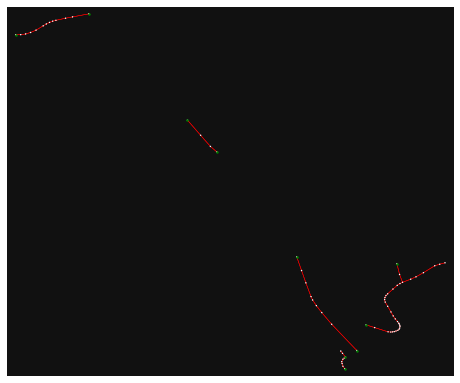

In [43]:
fig, ax = ox.plot_graph(G, edge_color='r', edge_linewidth=0.5, node_size=2, show=False, close=False)
noi = set(G.nodes()) & set(inner_node_list)
for node in noi:
    ax.scatter(G.nodes[node]['x'], G.nodes[node]['y'], color='green', s=2)
fig.savefig("Plot1.pdf",dpi=200, bbox_inches='tight')

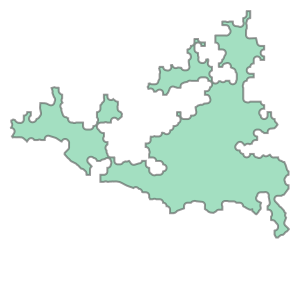

In [25]:
from shapely.geometry import Polygon
Polygon(geo_load_area.exterior)

In [54]:
mvlv_subst_list[15]

{'x': 4277962.28018,
 'y': 2728540.7478922918,
 'node_type': 'non_synthetic',
 'cluster': 15,
 'osmid': 300445477,
 'load_level': 'lv',
 'graph_district': <networkx.classes.multidigraph.MultiDiGraph at 0x7f1545bb76d0>}

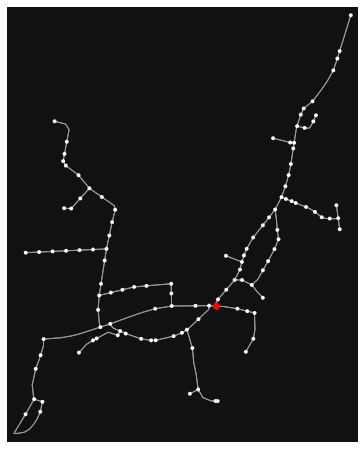

In [66]:
nodes, _ = ox.graph_to_gdfs(cluster_graph)
n = int(nodes.cluster.value_counts().index.max())

#15, 36
fig, ax = ox.plot_graph(mvlv_subst_list[13]['graph_district'], show=False, close=False)
ax.scatter(cluster_graph.nodes[mvlv_subst_list[13]['osmid']]['x'], cluster_graph.nodes[mvlv_subst_list[13]['osmid']]['y'], color='red')

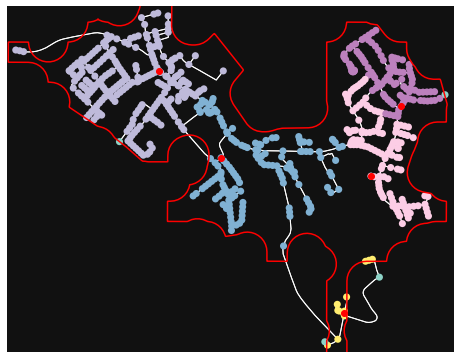

In [6]:
import pandas as pd
import osmnx as ox

nc = ox.plot.get_node_colors_by_attr(cluster_graph, attr='cluster', cmap="Set3") #

fig, ax = ox.plot_graph(cluster_graph, node_color=nc, node_size=50, edge_color='w', edge_linewidth=1, show=False, close=False)

x,y = geo_load_area.exterior.xy
ax.plot(x,y, color='red')

for station in mvlv_subst_list:
    
    ax.scatter(station.get('x'),station.get('y'), color='red')
    
#ax.scatter(cluster_graph.nodes[35239360]['x'], cluster_graph.nodes[35239360]['y'], color='red')

In [7]:
import osmnx as ox

fig, ax = ox.plot_graph(simp_graph, show=False, close=False)

x,y = geo_load_area.exterior.xy
ax.plot(x,y)  
    
#for station in mvlv_subst_list:
    
#    ax.scatter(station.get('x'),station.get('y'), color='red') 

NameError: name 'simp_graph' is not defined

In [8]:
import pyproj
from shapely.geometry import Point
from shapely.ops import transform

pyproj.__version__

'3.1.0'

In [26]:
# need to plot this poly to check if it contains buildings
# if no buildings skip and maybe load default ding0 load areal ? or nothing ?

import folium
from shapely import wkt

polygon = wkt.loads(u'POLYGON ((4280649.66118543 2733192.96358212, 4280652.23162465 2733191.14401754, 4280677.10559452 2733171.67933443, 4280679.57109515 2733169.53558295, 4280682.32291005 2733166.26830074, 4280682.36867518 2733166.18314461, 4280682.39597741 2733166.09040517, 4280682.40365295 2733165.99403557, 4280682.39137461 2733165.89814366, 4280680.99027165 2733161.86273429, 4280679.45467087 2733158.97893575, 4280633.32011754 2733082.19079191, 4280631.62527479 2733079.65629981, 4280628.94193936 2733076.68571781, 4280628.85925632 2733076.62383061, 4280628.76621011 2733076.57900974, 4280628.66627825 2733076.55293036, 4280628.56319567 2733076.54656717, 4280628.46081501 2733076.56015799, 4280624.66806574 2733077.84066546, 4280621.95085033 2733079.22373546, 4280579.05810256 2733103.73868397, 4280576.52547223 2733105.35434468, 4280573.50858927 2733107.96693295, 4280573.44526624 2733108.048084, 4280573.39881927 2733108.13994248, 4280573.37099947 2733108.23904525, 4280573.36285566 2733108.34165606, 4280573.37469486 2733108.44390641, 4280573.40607073 2733108.54194138, 4280575.33416572 2733112.03617232, 4280577.1523796 2733114.4275473, 4280632.12488847 2733179.86666707, 4280637.92176414 2733187.48707355, 4280640.79926137 2733191.67563158, 4280642.17701174 2733194.16686924, 4280643.98187605 2733194.36630572, 4280644.7637164 2733194.53409662, 4280645.54371172 2733194.80179476, 4280645.86514527 2733194.83536197, 4280645.96865245 2733194.82623389, 4280646.06851543 2733194.79752077, 4280649.66118543 2733192.96358212))')

wgs84 = pyproj.CRS('EPSG:4326')
utm = pyproj.CRS('EPSG:3035')

project = pyproj.Transformer.from_crs(utm, wgs84, always_xy=True).transform
utm_poly = transform(project, polygon)

m = folium.Map([47.711066,9.4603178], zoom_start=16)
folium.GeoJson(utm_poly).add_to(m)
m
